# Pytorch Lessons

## Import main libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import torch
from torch import nn
from torch.utils.data import DataLoader

from torchvision import datasets
from torchvision.transforms import ToTensor

from torch.utils.data import Dataset


## Tensors

Creating tensors and some tensor attibutes:

In [2]:
# Create tensor from numpy array:

X = np.random.normal(0,1,(10,10))
X = torch.tensor(X, dtype=torch.float64)


print('Element of a tensor:')
print(X[0,0])
print('Numpy content')
print(X.numpy())
print('Device')
print(X.device)
print('Shape')
print(X.shape)


Element of a tensor:
tensor(-0.7236, dtype=torch.float64)
Numpy content
[[-0.72357882 -0.98200559  0.02147    -0.91033548  0.33333997  0.54313593
   1.12440887  0.08147864 -0.02252688  0.2812191 ]
 [ 1.27805763 -1.09880695 -1.39086093  0.52215842 -0.35930462  0.20148094
   1.10331915 -0.91412485  1.92440095  0.1008614 ]
 [ 0.773226    0.38981079 -0.98103216  0.64313986 -0.96939597  0.79740426
   0.49371802  0.53984929  0.33192952  1.33570878]
 [-1.96221066 -0.57432703  0.67768535  1.71246152 -1.15014596  0.1724696
   0.32380595  0.2608312   0.26907074  1.08583287]
 [ 1.86156917 -0.09163716 -0.1577448   0.173819    1.21666601 -1.28942697
   0.82994133  1.73708082  0.01552051  0.80902603]
 [-0.35171488  0.5819074  -0.12761651 -0.11917034 -1.39278072 -0.36788984
  -1.47612238  0.3830713  -1.11807131 -1.83443072]
 [ 1.6200243  -0.00262089  0.74011618  2.06623135  0.67678398 -0.44693814
  -0.50125419  0.93866071  0.72019479  0.20478842]
 [ 1.68129694  1.07496465 -2.09703855  2.43402041 -0.4

Operations on tensors:

In [3]:

a = torch.tensor(np.arange(1,10).reshape(3,3), dtype=torch.float64)
b = torch.tensor(np.arange(10,19).reshape(3,3), dtype=torch.float64)

print('Sum of two tensors:')
print(a+b)
print('Tensor multiplication:')
print(a @ b)
print('Tensor transpose:')
print((a @ b).T)
print('Tensor multiplication:')
print(torch.matmul(a,b))
print('Mean:')
print(torch.mean(a))


Sum of two tensors:
tensor([[11., 13., 15.],
        [17., 19., 21.],
        [23., 25., 27.]], dtype=torch.float64)
Tensor multiplication:
tensor([[ 84.,  90.,  96.],
        [201., 216., 231.],
        [318., 342., 366.]], dtype=torch.float64)
Tensor transpose:
tensor([[ 84., 201., 318.],
        [ 90., 216., 342.],
        [ 96., 231., 366.]], dtype=torch.float64)
Tensor multiplication:
tensor([[ 84.,  90.,  96.],
        [201., 216., 231.],
        [318., 342., 366.]], dtype=torch.float64)
Mean:
tensor(5., dtype=torch.float64)


Inline operators have a _ in the end:

In [4]:
print(a)
a.transpose_(0,1)
print(a)
a.add_(5.0)
print(a)



tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]], dtype=torch.float64)
tensor([[1., 4., 7.],
        [2., 5., 8.],
        [3., 6., 9.]], dtype=torch.float64)
tensor([[ 6.,  9., 12.],
        [ 7., 10., 13.],
        [ 8., 11., 14.]], dtype=torch.float64)


Numpy and torch

In [5]:
# In CPU
a = np.arange(1,10).reshape(3,3)
print(a)
t = torch.from_numpy(a)
print(t)
a[0,0] = 4
print(t)

tt = torch.ones(3,3)

print(tt)

nn = tt.numpy()

nn[0,0] = 5.0

print(tt)




[[1 2 3]
 [4 5 6]
 [7 8 9]]
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[4, 2, 3],
        [4, 5, 6],
        [7, 8, 9]], dtype=torch.int32)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[5., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [6]:
if torch.accelerator.is_available():
    tensor = tensor.to(torch.accelerator.current_accelerator())

## Datasets

To implement a custom dataset, we use simulated data.



In [22]:
num = 10000
ep = 0.1

x = np.random.uniform(-4*np.pi,4*np.pi,(num,2))

y = np.sin(np.sqrt(x[:,0]**2+x[:,1]**2))+ ep*np.random.normal(0,1,num)


np.save('../DATA/x.npy', x)
np.save('../DATA/y.npy', y)


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x_file, y_file):
        # Class constructor:
        self.x = np.load(x_file)
        self.y = np.load(y_file)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        # Retrieves an item from the dataset:
        return self.x[index], self.y[index]
        # TODO: convert to tensor 
        
    def __len__(self):
        # Returns the length of the dataset:
        return self.len

In [25]:
data = CustomDataset('../DATA/x.npy', '../DATA/y.npy')

data.__getitem__(0)

(array([-5.0624608 ,  4.91559774]), 0.6958001151097415)

## Create a sequential NN

In [4]:
class MyNNTest(nn.Module):

    def __init__(self):
        # call the parent class constructor
        super().__init__()

        # self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.linear_relu_stack(x)
        return x

In [5]:
model = MyNNTest().double()

print(model)

MyNNTest(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=2, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [6]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [7]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 2]) | Values : tensor([[ 0.0804,  0.4670],
        [-0.3912, -0.0872]], dtype=torch.float64, grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.5305,  0.0899], dtype=torch.float64, grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0031, -0.0121, -0.0227,  ...,  0.0274,  0.0266, -0.0228],
        [-0.0186,  0.0263,  0.0003,  ..., -0.0039,  0.0016, -0.0199]],
       dtype=torch.float64, grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([0.0204, 0.0169], dtype=torch.float64, grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([1, 512]) | Values : tensor([[ 1.5638e-02,  2.2203e-02,  1.8166e-02,  3.8535e-02, -5.6893e-03,
         -2.1577e-02, -2.0472e-02, -6.2811e-03, -4.0958e-02, -2.3156e-02,
         -3.8314e-02, -2.9775e-02,  8

In [8]:
model.state_dict()['linear_relu_stack.0.weight']

tensor([[ 0.0804,  0.4670],
        [-0.3912, -0.0872],
        [ 0.2734,  0.2262],
        ...,
        [ 0.0681,  0.3311],
        [-0.3613, -0.0013],
        [-0.2722, -0.6667]], dtype=torch.float64)

In [7]:
ep = 0.3 # error term
num = 20000 #num poins

X = np.random.uniform(-4*np.pi,4*np.pi, (num,1))
Y = np.random.uniform(-4*np.pi,4*np.pi, (num,1))

XXX = np.hstack((X,Y))

Z = np.sin(np.sqrt(X**2+Y**2))+ ep*np.random.normal(0,1,(num,1))

In [8]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

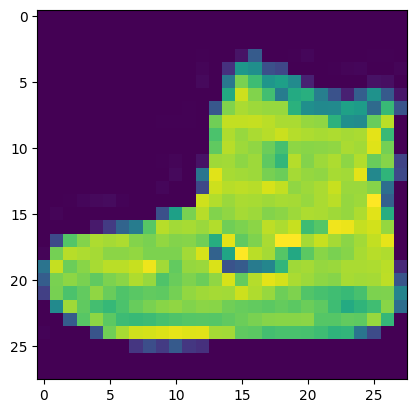

In [9]:
plt.imshow(training_data[0][0].reshape(28,28).numpy())

In [13]:
train_dataloader = DataLoader(training_data[0:64], batch_size=32)

ValueError: only one element tensors can be converted to Python scalars

In [11]:

for batch, (X, y) in enumerate(train_dataloader[0]):
    print(X.shape, y.shape)
    plt.imshow(X[0].reshape(28,28).numpy())



TypeError: 'DataLoader' object is not subscriptable

In [12]:
train_dataloader

In [9]:
torch.__version__

'2.6.0+cpu'